In [3]:
from collections import defaultdict
from csv import DictReader
from survey_response import SurveyResponse

def read_valid_results(path):
    valid_res = []
    with open(path, 'r') as file:
        reader = DictReader(file)
        next(reader)
        next(reader)
        for item in reader:
            if item['Status'] != 'Survey Preview' and item['Q6'] != '' and item['Screen 1'] == 'Yes' and item['Screen 2'] == '40':
                valid_res.append(item)
    return valid_res

path = '/home/daniel/GeneticBoulders/user_study/Evolving MoonBoard Routes_February 20, 2023_20.45.csv'
valid_res = read_valid_results(path)
all_responses = [SurveyResponse(res) for res in valid_res]

THRESHOLD = 0.5
reliable_responses = [r for r in all_responses if (p := r.perc_calibrated_gradeable()) and p >= THRESHOLD]
rr_dict = defaultdict(list)
for r in reliable_responses:
    rr_dict[r.max_climbed].append(r)

In [5]:
# Calculating general human accuracy on benchmarks
from statistics import mean
print(mean([r.perc_generated_correct() for r in all_responses]))
print(mean([r.perc_calibration_correct() for r in all_responses]))

0.30096153846153845
0.3192307692307692


V4 climbers: n=52, r=0.14312467376448354, p=0.31143246635313915
V5 climbers: n=48, r=0.17627953024193913, p=0.23071457293899217
V6 climbers: n=41, r=0.14376621397197403, p=0.36984938749844515
V7 climbers: n=38, r=0.12089140739439641, p=0.46968692769624615
V8 climbers: n=25, r=0.14817642649137813, p=0.4796480136509689
V9 climbers: n=16, r=0.12291749069008029, p=0.650179189713133
V10 climbers: n=10, r=-0.018187163220902313, p=0.9602287374508444
V11 climbers: n=5, r=-0.18898223650461388, p=0.7608203755145105
V12 climbers: n=3, r=0.4999999999999999, p=0.666666666666667
V13 climbers: n=2, r=-1.0, p=1.0


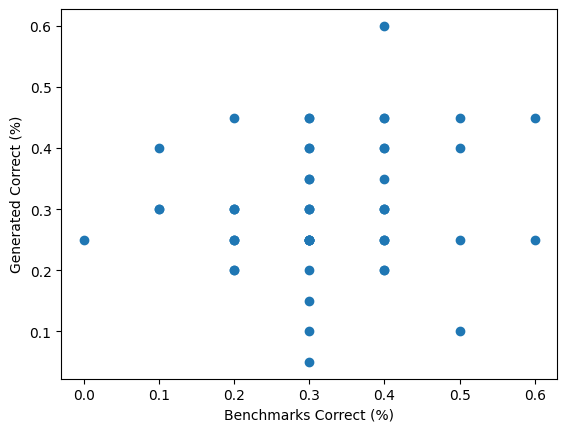

In [7]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, chisquare

responses = all_responses
advanced_responses = [r for r in all_responses if r.max_climbed > 9]
for i in range(3, 13):
    resps = [r for r in all_responses if r.max_climbed > i]
    calibs = [r.perc_calibration_correct() for r in resps]
    gener = [r.perc_generated_correct() for r in resps]
    n = len(resps)
    r, p = pearsonr(calibs, gener)
    print(f'V{i+1} climbers: n={n}, r={r}, p={p}')

calibs = [r.perc_calibration_correct() for r in responses]
gener = [r.perc_generated_correct() for r in responses]

# advanced_calibs = [r.perc_calibration_correct() for r in advanced_responses]
# advanced_generated = [r.perc_generated_correct() for r in advanced_responses]

# g_calibs = [r.perc_calibrated_gradeable() for r in responses]
# g_generated = [r.perc_generated_gradeable() for r in responses]



plt.xlabel('Benchmarks Correct (%)')
plt.ylabel('Generated Correct (%)')
plt.scatter(calibs, gener, label='Any Level')
# plt.scatter(advanced_calibs, advanced_generated, label='Advanced Climbers')
# plt.legend()
# # plt.scatter(g_calibs, g_generated)

# # g_r = pearsonr(g_calibs, g_generated)
# # print(f'pearson r for gradeable: r = {g_r[0]}, p = {g_r[1]}')


# print(f'Num responses: {len(responses)}')
# print(f'Num advanced responses: {len(advanced_responses)}')

# r = pearsonr(calibs, gener)
# print(f'pearson r for all: r = {r[0]}, p = {r[1]}')

# ar = pearsonr(advanced_calibs, advanced_generated)
# print(f'pearson r for advanced: r = {ar[0]}, p = {ar[1]}')

# plot points of varying intensity for overlapping in the plot
# can say that going to +-3 gives statistically significant results


In [ ]:
from statistics import mean
from image_link_mapping import IMAGE_LINKS
from survey_response import SurveyResponse
from collections import defaultdict
path = '/home/tyebkhad/GeneticBoulders/user_study/Evolving MoonBoard Routes_February 20, 2023_20.45.csv'

print(len(responses), 'valid responses')

print(len(reliable_responses), 'reliable responses')
calib_percs = sorted([(r.max_climbed, r.perc_calibrated_gradeable()) for r in reliable_responses], reverse=True)
gen_percs = sorted([(r.max_climbed, r.perc_generated_gradeable()) for r in reliable_responses], reverse=True)
print('Calibration:', calib_percs)
print('Generated:', gen_percs)
print(mean(i[1] for i in gen_percs))

# look at correlation between max grade and being accurate
# 

# print(sorted((r.max_gradeable() for r in responses), reverse=True))
# percs = [r.perc_calibrated_gradeable() for r in responses]
# print(sorted(percs, reverse=True))
# for resp in responses:
#     print(resp.perc_calibrated_gradeable())

# got_v4 = []
# for item in valid_res:
#     v4_resp = item['17_Q10']
#     if 'V4' in v4_resp or 'V5' in v4_resp:
#         got_v4.append(item)
# print(len(got_v4))
# for r in got_v4:
#     print(r)

10 valid responses
16 reliable responses
Calibration: [(10, 0.5), (10, 0.5), (10, 0.5), (9, 0.7142857142857143), (7, 0.8), (7, 0.6), (7, 0.6), (7, 0.6), (7, 0.6), (6, 0.75), (5, 1.0), (5, 0.6666666666666666), (4, 1.0), (4, 1.0), (4, 0.5), (4, 0.5)]
Generated: [(10, 0.4375), (10, 0.3125), (10, 0.125), (9, 0.5), (7, 0.6), (7, 0.3), (7, 0.2), (7, 0.1), (7, 0.1), (6, 0.125), (5, 0.8333333333333334), (5, 0.6666666666666666), (4, 0.25), (4, 0.25), (4, 0.0), (4, 0.0)]
0.3


## Recording
- 52 valid responses
### Allowing +- 1 in grade
- 16 responses with >= 50% correct calibration at or below their max climbing grade
    - these responses agreed with predicted grade 30% of the time
### Allowing +- 2 in grade
- 35 responses with >= 50% correct calib at or below max
    - these responses agreed with predicted grade about 55% of the time
### allowing +- 3
- 47 response are valid 
    - agree 71% of the time
